In [4]:
# from L-3 @ http://homepages.math.uic.edu/~jan/mcs563/index.html
# TODO: mark turning points, real solutions / complex conjugates

# %load usephcpy.py
"""
Illustration of a plot of solution paths
computed with the aid of phcpy.
"""
# print 'we fix the seed for reproducibiliy ...'
# from phcpy.phcpy2c import py2c_set_seed # n/a
# py2c_set_seed(34234234)

print 'using the blackbox solver ...'
from phcpy.solver import solve

p = ['x^2 + y - 3;', 'x + 0.125*y^2 - 1.5;']
s = solve(p)
for sol in s:
   print sol

print 'now we redo the computation for one path ...'
print 'constructing a total degree start system ...'
from phcpy.solver import total_degree_start_system as tds
q, qsols = tds(p)

print 'number of start solutions :', len(qsols)
print 'tracking one path ...'
from phcpy.trackers import standard_double_track as track
ss = track(p,q,[qsols[0]])
print ss[0]

# print 'deflate the singular solution at the end ...'
# from phcpy.solver import deflate # n/a
# ds = deflate(p,[ss[0]])
# print ds[0]

from phcpy.trackers import initialize_standard_tracker
from phcpy.trackers import initialize_standard_solution
from phcpy.trackers import next_standard_solution
initialize_standard_tracker(p,q)

using the blackbox solver ...
t :  1.00000000000000E+00   7.47852612790996E+00
m : 1
the solution for t :
 x : -3.00000000000000E+00   5.63536292589461E-132
 y : -6.00000000000000E+00   0.00000000000000E+00
== err :  3.400E-16 = rco :  3.163E-01 = res :  4.441E-16 =
t :  1.00000000000000E+00   4.02457210556242E+00
m : 3
the solution for t :
 x :  1.00000000000000E+00  -3.21215370589586E-17
 y :  2.00000000000000E+00   6.43318160192304E-17
== err :  2.417E-16 = rco :  7.386E-21 = res :  1.111E-16 =
now we redo the computation for one path ...
constructing a total degree start system ...
number of start solutions : 4
tracking one path ...
t :  1.00000000000000E+00   0.00000000000000E+00
m : 0
the solution for t :
 x :  9.99997450467945E-01  -5.01095387603836E-06
 y :  2.00000509908003E+00   1.00218769662111E-05
== err :  1.000E-05 = rco :  9.002E-12 = res :  1.189E-11 =


0

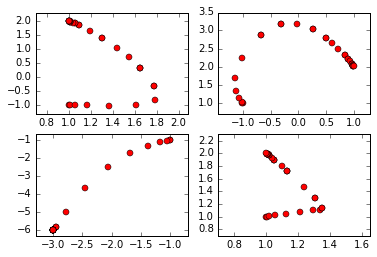

In [8]:
%matplotlib inline
from phcpy.solutions import strsol2dict
import matplotlib.pyplot as plt

plt.ion()
fig = plt.figure()
for k in range(len(qsols)):
   axs = fig.add_subplot(220 + k)
   startsol = qsols[k]
    
   initialize_standard_solution(len(p),startsol)
   dictsol = strsol2dict(startsol)
   xpoints =  [dictsol['x']]
   ypoints =  [dictsol['y']]
    
   for k in range(30):
       ns = next_standard_solution()
       dictsol = strsol2dict(ns)
       xpoints.append(dictsol['x'])
       ypoints.append(dictsol['y'])
    
   xre = [point.real for point in xpoints]
   yre = [point.real for point in ypoints]
   axs.set_xlim(min(xre)-0.3, max(xre)+0.3)
   axs.set_ylim(min(yre)-0.3, max(yre)+0.3)
   dots, = axs.plot(xre,yre,'ro')

# fig.canvas.draw()
# ans = raw_input('hit return to exit')